In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
police_data = pd.read_csv(r'C:\DA12\capstone\capstone-da12\data\police calls for service data\Metro_Nashville_Police_Department_Incidents.csv', low_memory=False)
police_data.head()

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Race,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported
0,-9.655185e+06,4.329418e+06,1,20190522445_11,20190522445,D,DISPATCHED,U,UNFOUNDED,Closed,...,B,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37216.0,17,2019/07/12 13:00:00+00,2019/07/12 19:04:00+00
1,-9.646057e+06,4.322660e+06,2,20190526626_11,20190526626,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,W,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37214.0,09,2019/07/14 16:00:00+00,2019/07/14 18:55:00+00
2,-9.646057e+06,4.322660e+06,3,20190526626_21,20190526626,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,W,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37214.0,17,2019/07/14 16:00:00+00,2019/07/14 18:55:00+00
3,-9.666985e+06,4.318524e+06,4,20190528995_11,20190528995,D,DISPATCHED,O,OPEN,Open,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,2019/07/15 17:30:00+00,2019/07/15 18:47:00+00
4,-9.666985e+06,4.326797e+06,5,20190528693_11,20190528693,D,DISPATCHED,O,OPEN,Open,...,B,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2019/07/15 14:20:00+00,2019/07/15 16:13:00+00


In [3]:
# error when loading dataframe: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
# did some googling, decided to use low_memory=False
# opened file in excel, all values are empty and all values are NaN on pandas?

In [4]:
police_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944481 entries, 0 to 944480
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   X                            925268 non-null  float64
 1   Y                            925268 non-null  float64
 2   OBJECTID                     944481 non-null  int64  
 3   Primary_Key                  944481 non-null  object 
 4   Incident_Number              944481 non-null  int64  
 5   Report_Type                  944380 non-null  object 
 6   Report_Type_Description      879532 non-null  object 
 7   Incident_Status_Code         944461 non-null  object 
 8   Incident_Status_Description  944386 non-null  object 
 9   Investigation_Status         944481 non-null  object 
 10  Incident_Location            938652 non-null  object 
 11  Latitude                     925268 non-null  float64
 12  Longitude                    925268 non-null  float64
 13 

rates.columns = rates.columns.str.replace(' ', '')
rates

In [6]:
police_data['ZIP_Code'] = police_data['ZIP_Code'].str.replace('.','')
police_data['ZIP_Code']

0         372160
1         372140
2         372140
3            NaN
4            NaN
           ...  
944476    372010
944477       NaN
944478       NaN
944479       NaN
944480    370760
Name: ZIP_Code, Length: 944481, dtype: object

police_data['ZIP_Code'] = police_data['ZIP_Code'].astype(float)
police_data['ZIP_Code']

In [8]:
police_data.columns


Index(['X', 'Y', 'OBJECTID', 'Primary_Key', 'Incident_Number', 'Report_Type',
       'Report_Type_Description', 'Incident_Status_Code',
       'Incident_Status_Description', 'Investigation_Status',
       'Incident_Location', 'Latitude', 'Longitude', 'RPA', 'Zone',
       'Location_Code', 'Location_Description', 'Offense_Number',
       'Offense_NIBRS', 'Offense_Description', 'Weapon_Description',
       'Victim_Number', 'Domestic_Related', 'Victim_Type',
       'Victim_Description', 'Victim_Gender', 'Victim_Race',
       'Victim_Ethnicity', 'Victim_County_Resident', 'Mapped_Location',
       'POINT_X', 'POINT_Y', 'ZIP_Code', 'Weapon_Primary', 'Incident_Occurred',
       'Incident_Reported'],
      dtype='object')

In [9]:
police_data['POINT_Y']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
944476   NaN
944477   NaN
944478   NaN
944479   NaN
944480   NaN
Name: POINT_Y, Length: 944481, dtype: float64

In [10]:
# find area that has the most calls

In [11]:
police_data['Location_Code']

0          5.0
1         22.0
2         22.0
3          8.0
4         22.0
          ... 
944476     3.0
944477    90.0
944478    20.0
944479    22.0
944480    22.0
Name: Location_Code, Length: 944481, dtype: float64

In [12]:
police_data['Location_Code'].value_counts()

Location_Code
22.0    285190
20.0    179864
13.0    124499
90.0    110940
8.0      25146
         ...  
83.0        35
79.0        25
47.0        18
49.0        13
56.0         1
Name: count, Length: 62, dtype: int64

In [13]:
# Location Code 22 shows up the most

In [14]:
police_data.loc[police_data['Location_Code'] == 22]

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Race,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported
1,-9.646057e+06,4.322660e+06,2,20190526626_11,20190526626,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,W,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372140,09,2019/07/14 16:00:00+00,2019/07/14 18:55:00+00
2,-9.646057e+06,4.322660e+06,3,20190526626_21,20190526626,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,W,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372140,17,2019/07/14 16:00:00+00,2019/07/14 18:55:00+00
4,-9.666985e+06,4.326797e+06,5,20190528693_11,20190528693,D,DISPATCHED,O,OPEN,Open,...,B,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2019/07/15 14:20:00+00,2019/07/15 16:13:00+00
15,-9.652513e+06,4.326797e+06,16,20190508753_11,20190508753,D,DISPATCHED,O,OPEN,Open,...,W,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2019/07/06 19:25:00+00,2019/07/06 19:58:00+00
20,-9.661419e+06,4.318524e+06,21,20190528665_11,20190528665,D,DISPATCHED,O,OPEN,Open,...,W,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2019/07/15 14:14:00+00,2019/07/15 16:20:00+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944454,-9.658636e+06,4.323763e+06,944455,20240476501_11,20240476501,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,B,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372060,NaN,2024/07/19 03:50:00+00,2024/07/19 04:36:00+00
944465,-9.641381e+06,4.314390e+06,944466,20240470448_11,20240470448,O,NaN,O,OPEN,Open,...,U,Unknown,NON RESIDENT,NaN,NaN,NaN,NaN,17,2024/05/14 05:01:00+00,2024/07/16 23:01:00+00
944467,-9.664758e+06,4.322660e+06,944468,20240493835_11,20240493835,D,DISPATCHED,O,OPEN,Open,...,W,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,01,2024/07/26 21:23:00+00,2024/07/27 03:23:00+00
944479,-9.652513e+06,4.310258e+06,944480,20240505615_11,20240505615,D,DISPATCHED,O,OPEN,Open,...,W,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2024/08/01 04:13:00+00,2024/08/01 05:04:00+00


In [15]:
# Maybe try zipcode instead?

In [16]:
police_data['ZIP_Code']

0         372160
1         372140
2         372140
3            NaN
4            NaN
           ...  
944476    372010
944477       NaN
944478       NaN
944479       NaN
944480    370760
Name: ZIP_Code, Length: 944481, dtype: object

In [17]:
police_data['ZIP_Code'].value_counts()

ZIP_Code
372070    50263
370130    47252
372110    45841
371150    40530
372030    29798
          ...  
371850        1
373300        1
370780        1
372740        1
370570        1
Name: count, Length: 130, dtype: int64

In [18]:
police_data['Incident_Reported'] = pd.to_datetime(police_data['Incident_Reported'])

In [19]:
police_data['Incident_Occurred'] = pd.to_datetime(police_data['Incident_Occurred'])

In [20]:
police_data['year'] = police_data['Incident_Occurred'].dt.year
police_data

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
0,-9.655185e+06,4.329418e+06,1,20190522445_11,20190522445,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372160,17,2019-07-12 13:00:00+00:00,2019-07-12 19:04:00+00:00,2019
1,-9.646057e+06,4.322660e+06,2,20190526626_11,20190526626,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372140,09,2019-07-14 16:00:00+00:00,2019-07-14 18:55:00+00:00,2019
2,-9.646057e+06,4.322660e+06,3,20190526626_21,20190526626,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372140,17,2019-07-14 16:00:00+00:00,2019-07-14 18:55:00+00:00,2019
3,-9.666985e+06,4.318524e+06,4,20190528995_11,20190528995,D,DISPATCHED,O,OPEN,Open,...,NaN,NaN,NaN,NaN,NaN,NaN,17,2019-07-15 17:30:00+00:00,2019-07-15 18:47:00+00:00,2019
4,-9.666985e+06,4.326797e+06,5,20190528693_11,20190528693,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2019-07-15 14:20:00+00:00,2019-07-15 16:13:00+00:00,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944476,-9.659971e+06,4.322797e+06,944477,20240496858_22,20240496858,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,372010,17,2024-07-28 09:49:00+00:00,2024-07-28 11:58:00+00:00,2024
944477,-9.640268e+06,4.324038e+06,944478,20240497877_11,20240497877,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,06,2024-07-29 03:20:00+00:00,2024-07-29 05:16:00+00:00,2024
944478,-9.640268e+06,4.324038e+06,944479,20240497877_21,20240497877,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,06,2024-07-29 03:20:00+00:00,2024-07-29 05:16:00+00:00,2024
944479,-9.652513e+06,4.310258e+06,944480,20240505615_11,20240505615,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2024-08-01 04:13:00+00:00,2024-08-01 05:04:00+00:00,2024


In [21]:
police_data = police_data[police_data['year'].isin([2020,2021,2022,2023,2024])]
police_data

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
128010,-9.657634e+06,4.323900e+06,128011,20220026223_11,20220026223,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372060,17,2022-01-19 06:00:00+00:00,2022-01-19 06:44:00+00:00,2022
128016,-9.671437e+06,4.314390e+06,128017,20200456555_11,20200456555,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,16,2020-07-11 05:01:00+00:00,2020-07-11 16:09:00+00:00,2020
128017,-9.653626e+06,4.335076e+06,128018,20200464297_11,20200464297,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2020-07-15 17:30:00+00:00,2020-07-15 18:02:00+00:00,2020
128018,-9.668320e+06,4.328728e+06,128019,20200465547_11,20200465547,S,SUSPECT,R,REFUSED TO COOPERATE,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372180,17,2020-07-15 06:00:00+00:00,2020-07-16 10:28:00+00:00,2020
128019,-9.656855e+06,4.316732e+06,128020,20200587978_11,20200587978,D,DISPATCHED,U,UNFOUNDED,Closed,...,NaN,NaN,NaN,NaN,NaN,372110,17,2020-09-13 02:56:00+00:00,2020-09-13 03:15:00+00:00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944476,-9.659971e+06,4.322797e+06,944477,20240496858_22,20240496858,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,372010,17,2024-07-28 09:49:00+00:00,2024-07-28 11:58:00+00:00,2024
944477,-9.640268e+06,4.324038e+06,944478,20240497877_11,20240497877,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,06,2024-07-29 03:20:00+00:00,2024-07-29 05:16:00+00:00,2024
944478,-9.640268e+06,4.324038e+06,944479,20240497877_21,20240497877,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,06,2024-07-29 03:20:00+00:00,2024-07-29 05:16:00+00:00,2024
944479,-9.652513e+06,4.310258e+06,944480,20240505615_11,20240505615,D,DISPATCHED,O,OPEN,Open,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,NaN,17,2024-08-01 04:13:00+00:00,2024-08-01 05:04:00+00:00,2024


In [22]:
police_data = police_data.replace(to_replace='372070',
                    value='37207')

In [23]:
most_incidents = police_data[police_data['ZIP_Code'] == '37207']
most_incidents

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
128020,-9.659637e+06,4.325831e+06,128021,20200625099_11,20200625099,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2020-10-01 12:44:00+00:00,2020-10-01 14:29:00+00:00,2020
128034,-9.661530e+06,4.332039e+06,128035,20200659451_11,20200659451,D,DISPATCHED,U,UNFOUNDED,Closed,...,NaN,NaN,NaN,NaN,NaN,37207,16,2020-10-19 22:40:00+00:00,2020-10-19 23:28:00+00:00,2020
128102,-9.661864e+06,4.330108e+06,128103,20200022273_11,20200022273,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37207,17,2020-01-10 19:29:00+00:00,2020-01-10 20:16:00+00:00,2020
128139,-9.658524e+06,4.324728e+06,128140,20200030828_11,20200030828,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2020-01-14 16:15:00+00:00,2020-01-14 16:58:00+00:00,2020
128151,-9.658079e+06,4.331901e+06,128152,20200541212_11,20200541212,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2020-08-22 19:16:00+00:00,2020-08-22 19:16:00+00:00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944329,-9.660083e+06,4.327348e+06,944330,20240374878_31,20240374878,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,NaN,NaN,NaN,NaN,NaN,37207,01S,2024-06-05 16:32:00+00:00,2024-09-10 14:48:00+00:00,2024
944373,-9.660083e+06,4.329142e+06,944374,20240537032_11,20240537032,D,DISPATCHED,D,DEATH OF OFFENDER,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2024-08-14 22:12:00+00:00,2024-08-15 02:40:00+00:00,2024
944429,-9.658413e+06,4.329004e+06,944430,20240409126_11,20240409126,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2024-06-19 23:00:00+00:00,2024-06-20 03:39:00+00:00,2024
944430,-9.658413e+06,4.329004e+06,944431,20240409126_21,20240409126,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2024-06-19 23:00:00+00:00,2024-06-20 03:39:00+00:00,2024


In [24]:
most_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29924 entries, 128020 to 944435
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   X                            29099 non-null  float64            
 1   Y                            29099 non-null  float64            
 2   OBJECTID                     29924 non-null  int64              
 3   Primary_Key                  29924 non-null  object             
 4   Incident_Number              29924 non-null  int64              
 5   Report_Type                  29922 non-null  object             
 6   Report_Type_Description      28995 non-null  object             
 7   Incident_Status_Code         29923 non-null  object             
 8   Incident_Status_Description  29916 non-null  object             
 9   Investigation_Status         29924 non-null  object             
 10  Incident_Location            29924 non-null  

In [25]:
police_data[police_data['ZIP_Code'] == '37207']

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
128020,-9.659637e+06,4.325831e+06,128021,20200625099_11,20200625099,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2020-10-01 12:44:00+00:00,2020-10-01 14:29:00+00:00,2020
128034,-9.661530e+06,4.332039e+06,128035,20200659451_11,20200659451,D,DISPATCHED,U,UNFOUNDED,Closed,...,NaN,NaN,NaN,NaN,NaN,37207,16,2020-10-19 22:40:00+00:00,2020-10-19 23:28:00+00:00,2020
128102,-9.661864e+06,4.330108e+06,128103,20200022273_11,20200022273,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37207,17,2020-01-10 19:29:00+00:00,2020-01-10 20:16:00+00:00,2020
128139,-9.658524e+06,4.324728e+06,128140,20200030828_11,20200030828,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2020-01-14 16:15:00+00:00,2020-01-14 16:58:00+00:00,2020
128151,-9.658079e+06,4.331901e+06,128152,20200541212_11,20200541212,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2020-08-22 19:16:00+00:00,2020-08-22 19:16:00+00:00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944329,-9.660083e+06,4.327348e+06,944330,20240374878_31,20240374878,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,NaN,NaN,NaN,NaN,NaN,37207,01S,2024-06-05 16:32:00+00:00,2024-09-10 14:48:00+00:00,2024
944373,-9.660083e+06,4.329142e+06,944374,20240537032_11,20240537032,D,DISPATCHED,D,DEATH OF OFFENDER,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2024-08-14 22:12:00+00:00,2024-08-15 02:40:00+00:00,2024
944429,-9.658413e+06,4.329004e+06,944430,20240409126_11,20240409126,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2024-06-19 23:00:00+00:00,2024-06-20 03:39:00+00:00,2024
944430,-9.658413e+06,4.329004e+06,944431,20240409126_21,20240409126,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2024-06-19 23:00:00+00:00,2024-06-20 03:39:00+00:00,2024


In [26]:
police_data['Incident_Reported']

128010   2022-01-19 06:44:00+00:00
128016   2020-07-11 16:09:00+00:00
128017   2020-07-15 18:02:00+00:00
128018   2020-07-16 10:28:00+00:00
128019   2020-09-13 03:15:00+00:00
                    ...           
944476   2024-07-28 11:58:00+00:00
944477   2024-07-29 05:16:00+00:00
944478   2024-07-29 05:16:00+00:00
944479   2024-08-01 05:04:00+00:00
944480   2024-08-01 02:57:00+00:00
Name: Incident_Reported, Length: 576643, dtype: datetime64[ns, UTC]

In [27]:
most_incidents['Incident_Reported'].count()

29924

In [28]:
most_incidents

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
128020,-9.659637e+06,4.325831e+06,128021,20200625099_11,20200625099,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2020-10-01 12:44:00+00:00,2020-10-01 14:29:00+00:00,2020
128034,-9.661530e+06,4.332039e+06,128035,20200659451_11,20200659451,D,DISPATCHED,U,UNFOUNDED,Closed,...,NaN,NaN,NaN,NaN,NaN,37207,16,2020-10-19 22:40:00+00:00,2020-10-19 23:28:00+00:00,2020
128102,-9.661864e+06,4.330108e+06,128103,20200022273_11,20200022273,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37207,17,2020-01-10 19:29:00+00:00,2020-01-10 20:16:00+00:00,2020
128139,-9.658524e+06,4.324728e+06,128140,20200030828_11,20200030828,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2020-01-14 16:15:00+00:00,2020-01-14 16:58:00+00:00,2020
128151,-9.658079e+06,4.331901e+06,128152,20200541212_11,20200541212,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2020-08-22 19:16:00+00:00,2020-08-22 19:16:00+00:00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944329,-9.660083e+06,4.327348e+06,944330,20240374878_31,20240374878,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,NaN,NaN,NaN,NaN,NaN,37207,01S,2024-06-05 16:32:00+00:00,2024-09-10 14:48:00+00:00,2024
944373,-9.660083e+06,4.329142e+06,944374,20240537032_11,20240537032,D,DISPATCHED,D,DEATH OF OFFENDER,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2024-08-14 22:12:00+00:00,2024-08-15 02:40:00+00:00,2024
944429,-9.658413e+06,4.329004e+06,944430,20240409126_11,20240409126,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2024-06-19 23:00:00+00:00,2024-06-20 03:39:00+00:00,2024
944430,-9.658413e+06,4.329004e+06,944431,20240409126_21,20240409126,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2024-06-19 23:00:00+00:00,2024-06-20 03:39:00+00:00,2024


In [29]:
most_incidents.reset_index()

,index,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
0,128020,-9.659637e+06,4.325831e+06,128021,20200625099_11,20200625099,D,DISPATCHED,A,CLEARED BY ARREST,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2020-10-01 12:44:00+00:00,2020-10-01 14:29:00+00:00,2020
1,128034,-9.661530e+06,4.332039e+06,128035,20200659451_11,20200659451,D,DISPATCHED,U,UNFOUNDED,...,NaN,NaN,NaN,NaN,NaN,37207,16,2020-10-19 22:40:00+00:00,2020-10-19 23:28:00+00:00,2020
2,128102,-9.661864e+06,4.330108e+06,128103,20200022273_11,20200022273,D,DISPATCHED,U,UNFOUNDED,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37207,17,2020-01-10 19:29:00+00:00,2020-01-10 20:16:00+00:00,2020
3,128139,-9.658524e+06,4.324728e+06,128140,20200030828_11,20200030828,D,DISPATCHED,A,CLEARED BY ARREST,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2020-01-14 16:15:00+00:00,2020-01-14 16:58:00+00:00,2020
4,128151,-9.658079e+06,4.331901e+06,128152,20200541212_11,20200541212,D,DISPATCHED,A,CLEARED BY ARREST,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2020-08-22 19:16:00+00:00,2020-08-22 19:16:00+00:00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29919,944329,-9.660083e+06,4.327348e+06,944330,20240374878_31,20240374878,D,DISPATCHED,A,CLEARED BY ARREST,...,NaN,NaN,NaN,NaN,NaN,37207,01S,2024-06-05 16:32:00+00:00,2024-09-10 14:48:00+00:00,2024
29920,944373,-9.660083e+06,4.329142e+06,944374,20240537032_11,20240537032,D,DISPATCHED,D,DEATH OF OFFENDER,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2024-08-14 22:12:00+00:00,2024-08-15 02:40:00+00:00,2024
29921,944429,-9.658413e+06,4.329004e+06,944430,20240409126_11,20240409126,D,DISPATCHED,A,CLEARED BY ARREST,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2024-06-19 23:00:00+00:00,2024-06-20 03:39:00+00:00,2024
29922,944430,-9.658413e+06,4.329004e+06,944431,20240409126_21,20240409126,D,DISPATCHED,A,CLEARED BY ARREST,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2024-06-19 23:00:00+00:00,2024-06-20 03:39:00+00:00,2024


In [30]:
most_incidents['year'] = most_incidents['Incident_Occurred'].dt.year
most_incidents.reset_index()

C:\Users\erica\AppData\Local\Temp\ipykernel_10044\701570977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_incidents['year'] = most_incidents['Incident_Occurred'].dt.year


,index,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
0,128020,-9.659637e+06,4.325831e+06,128021,20200625099_11,20200625099,D,DISPATCHED,A,CLEARED BY ARREST,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2020-10-01 12:44:00+00:00,2020-10-01 14:29:00+00:00,2020
1,128034,-9.661530e+06,4.332039e+06,128035,20200659451_11,20200659451,D,DISPATCHED,U,UNFOUNDED,...,NaN,NaN,NaN,NaN,NaN,37207,16,2020-10-19 22:40:00+00:00,2020-10-19 23:28:00+00:00,2020
2,128102,-9.661864e+06,4.330108e+06,128103,20200022273_11,20200022273,D,DISPATCHED,U,UNFOUNDED,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37207,17,2020-01-10 19:29:00+00:00,2020-01-10 20:16:00+00:00,2020
3,128139,-9.658524e+06,4.324728e+06,128140,20200030828_11,20200030828,D,DISPATCHED,A,CLEARED BY ARREST,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2020-01-14 16:15:00+00:00,2020-01-14 16:58:00+00:00,2020
4,128151,-9.658079e+06,4.331901e+06,128152,20200541212_11,20200541212,D,DISPATCHED,A,CLEARED BY ARREST,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2020-08-22 19:16:00+00:00,2020-08-22 19:16:00+00:00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29919,944329,-9.660083e+06,4.327348e+06,944330,20240374878_31,20240374878,D,DISPATCHED,A,CLEARED BY ARREST,...,NaN,NaN,NaN,NaN,NaN,37207,01S,2024-06-05 16:32:00+00:00,2024-09-10 14:48:00+00:00,2024
29920,944373,-9.660083e+06,4.329142e+06,944374,20240537032_11,20240537032,D,DISPATCHED,D,DEATH OF OFFENDER,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2024-08-14 22:12:00+00:00,2024-08-15 02:40:00+00:00,2024
29921,944429,-9.658413e+06,4.329004e+06,944430,20240409126_11,20240409126,D,DISPATCHED,A,CLEARED BY ARREST,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2024-06-19 23:00:00+00:00,2024-06-20 03:39:00+00:00,2024
29922,944430,-9.658413e+06,4.329004e+06,944431,20240409126_21,20240409126,D,DISPATCHED,A,CLEARED BY ARREST,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2024-06-19 23:00:00+00:00,2024-06-20 03:39:00+00:00,2024


In [31]:
most_incidents['Incident_Reported'].value_counts()


Incident_Reported
2024-04-08 07:17:00+00:00    28
2021-12-11 03:21:00+00:00    19
2024-06-07 09:23:00+00:00    16
2022-12-31 17:36:00+00:00    13
2024-02-16 13:35:00+00:00    12
                             ..
2020-09-16 23:01:00+00:00     1
2020-09-09 07:35:00+00:00     1
2020-09-09 08:06:00+00:00     1
2020-09-09 00:04:00+00:00     1
2024-06-20 07:16:00+00:00     1
Name: count, Length: 24590, dtype: int64

In [32]:
count37207 = most_incidents['year'].value_counts()
count37207

year
2021    6489
2020    6345
2023    6332
2022    6247
2024    4511
Name: count, dtype: int64

In [33]:
most_incidents

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
128020,-9.659637e+06,4.325831e+06,128021,20200625099_11,20200625099,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2020-10-01 12:44:00+00:00,2020-10-01 14:29:00+00:00,2020
128034,-9.661530e+06,4.332039e+06,128035,20200659451_11,20200659451,D,DISPATCHED,U,UNFOUNDED,Closed,...,NaN,NaN,NaN,NaN,NaN,37207,16,2020-10-19 22:40:00+00:00,2020-10-19 23:28:00+00:00,2020
128102,-9.661864e+06,4.330108e+06,128103,20200022273_11,20200022273,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37207,17,2020-01-10 19:29:00+00:00,2020-01-10 20:16:00+00:00,2020
128139,-9.658524e+06,4.324728e+06,128140,20200030828_11,20200030828,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2020-01-14 16:15:00+00:00,2020-01-14 16:58:00+00:00,2020
128151,-9.658079e+06,4.331901e+06,128152,20200541212_11,20200541212,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2020-08-22 19:16:00+00:00,2020-08-22 19:16:00+00:00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944329,-9.660083e+06,4.327348e+06,944330,20240374878_31,20240374878,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,NaN,NaN,NaN,NaN,NaN,37207,01S,2024-06-05 16:32:00+00:00,2024-09-10 14:48:00+00:00,2024
944373,-9.660083e+06,4.329142e+06,944374,20240537032_11,20240537032,D,DISPATCHED,D,DEATH OF OFFENDER,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,09,2024-08-14 22:12:00+00:00,2024-08-15 02:40:00+00:00,2024
944429,-9.658413e+06,4.329004e+06,944430,20240409126_11,20240409126,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2024-06-19 23:00:00+00:00,2024-06-20 03:39:00+00:00,2024
944430,-9.658413e+06,4.329004e+06,944431,20240409126_21,20240409126,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37207,17,2024-06-19 23:00:00+00:00,2024-06-20 03:39:00+00:00,2024


In [34]:
count37207.reset_index()

,year,count
0,2021,6489
1,2020,6345
2,2023,6332
3,2022,6247
4,2024,4511


In [35]:
count37207.info()

<class 'pandas.core.series.Series'>
Index: 5 entries, 2021 to 2024
Series name: count
Non-Null Count  Dtype
--------------  -----
5 non-null      int64
dtypes: int64(1)
memory usage: 60.0 bytes


In [36]:
# count of number of incidents in 37207 within the data

<Axes: title={'center': '37207 Incident Occurrences 2021-2024'}, ylabel='year'>

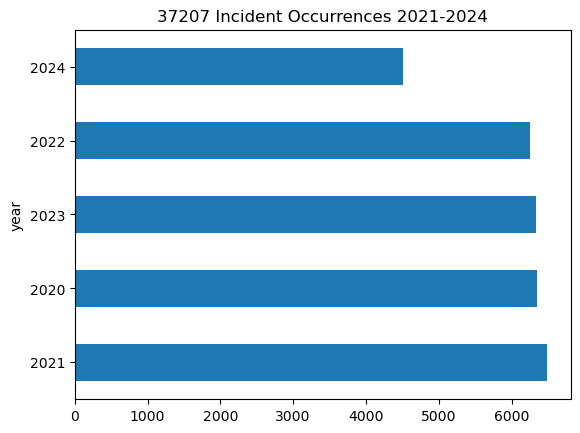

In [37]:
count37207.plot.barh( x='year', y='count',  title='37207 Incident Occurrences 2021-2024')

In [38]:
# data for zip code 37013

In [39]:
police_data[police_data['ZIP_Code'] == '37013']

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
818836,-9.648840e+06,4.310808e+06,818837,20220414402_11,20220414402,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,NaN,NaN,NaN,NaN,NaN,37013,17,2022-08-21 02:30:00+00:00,2022-08-21 06:01:00+00:00,2022
818845,NaN,NaN,818846,20220333309_11,20220333309,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,NaN,NaN,NaN,NaN,NaN,37013,17,2022-07-06 04:04:00+00:00,2022-07-08 02:50:00+00:00,2022
818870,-9.652513e+06,4.303649e+06,818871,20220415404_11,20220415404,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37013,17,2022-08-21 17:00:00+00:00,2022-08-21 21:44:00+00:00,2022
818958,-9.643941e+06,4.306264e+06,818959,20220374473_11,20220374473,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37013,17,2022-07-30 03:00:00+00:00,2022-07-30 13:21:00+00:00,2022
818962,-9.646724e+06,4.307641e+06,818963,20220310969_11,20220310969,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37013,17,2022-06-24 17:00:00+00:00,2022-06-25 04:30:00+00:00,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835850,-9.645055e+06,4.308192e+06,835851,20230698594_11,20230698594,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37013,06,2023-11-22 02:32:00+00:00,2023-11-22 03:22:00+00:00,2023
835857,-9.645055e+06,4.308192e+06,835858,20230698594_12,20230698594,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37013,06,2023-11-22 02:32:00+00:00,2023-11-22 03:22:00+00:00,2023
835947,-9.638264e+06,4.310533e+06,835948,20230687456_11,20230687456,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37013,17,2023-10-30 13:00:00+00:00,2023-11-16 20:15:00+00:00,2023
835966,-9.643941e+06,4.306264e+06,835967,20240259081_11,20240259081,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37013,09,2024-04-17 18:21:00+00:00,2024-04-17 21:45:00+00:00,2024


In [40]:
police_data = police_data.replace(to_replace='370130',
                    value='37013')

In [41]:
incidents_013 = police_data[police_data['ZIP_Code'] == '37013']
incidents_013

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
128136,-9.644832e+06,4.308880e+06,128137,20200023476_11,20200023476,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37013,09,2020-01-11 06:10:00+00:00,2020-01-11 08:20:00+00:00,2020
128198,-9.649062e+06,4.310120e+06,128199,20200559785_11,20200559785,S,SUSPECT,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37013,17,2020-08-31 11:00:00+00:00,2020-08-31 11:33:00+00:00,2020
128202,-9.647170e+06,4.305989e+06,128203,20200554494_11,20200554494,O,NaN,A,CLEARED BY ARREST,Closed,...,Hispanic,RESIDENT,NaN,NaN,NaN,37013,17,2020-08-24 21:30:00+00:00,2020-08-28 18:00:00+00:00,2020
128209,-9.649730e+06,4.306815e+06,128210,20200564220_11,20200564220,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37013,17,2020-09-02 06:15:00+00:00,2020-09-02 07:06:00+00:00,2020
128234,-9.652068e+06,4.305576e+06,128235,20200585434_11,20200585434,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37013,17,2020-09-11 20:40:00+00:00,2020-09-11 20:40:00+00:00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944370,-9.645723e+06,4.312599e+06,944371,20240536662_21,20240536662,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,Hispanic,RESIDENT,NaN,NaN,NaN,37013,09,2024-03-31 02:00:00+00:00,2024-08-14 22:54:00+00:00,2024
944372,-9.644721e+06,4.309844e+06,944373,20240536683_11,20240536683,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,Hispanic,RESIDENT,NaN,NaN,NaN,37013,09,2024-08-14 16:00:00+00:00,2024-08-14 21:36:00+00:00,2024
944388,-9.640602e+06,4.311773e+06,944389,20240543395_11,20240543395,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37013,09,2024-08-17 09:38:00+00:00,2024-08-17 11:34:00+00:00,2024
944401,-9.650621e+06,4.300484e+06,944402,20240558402_11,20240558402,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37013,17,2024-08-23 13:15:00+00:00,2024-08-23 17:00:00+00:00,2024


In [42]:
count37013 = incidents_013['year'].value_counts()
count37013

year
2023    7154
2022    6251
2021    5842
2020    5669
2024    5444
Name: count, dtype: int64

In [43]:
count37013.reset_index()

,year,count
0,2023,7154
1,2022,6251
2,2021,5842
3,2020,5669
4,2024,5444


<Axes: title={'center': '37013 Incident Occurrences 2020-2024'}, xlabel='year'>

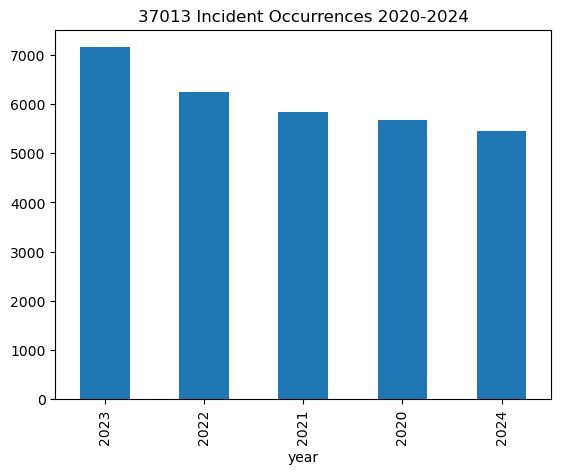

In [44]:
count37013.plot.bar( x='year', y='count', title='37013 Incident Occurrences 2020-2024')

In [45]:
#data for 37206

In [46]:
police_data[police_data['ZIP_Code'] == '37206']

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
818429,-9.654405e+06,4.327210e+06,818430,20220412152_11,20220412152,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,01,2022-08-19 18:45:00+00:00,2022-08-19 19:50:00+00:00,2022
818433,-9.654405e+06,4.327210e+06,818434,20220412152_22,20220412152,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,NaN,NaN,NaN,NaN,NaN,37206,01,2022-08-19 18:45:00+00:00,2022-08-19 19:50:00+00:00,2022
818877,-9.658190e+06,4.323349e+06,818878,20220365998_11,20220365998,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2022-06-01 05:01:00+00:00,2022-07-26 00:11:00+00:00,2022
818880,-9.657968e+06,4.323625e+06,818881,20220418888_11,20220418888,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,09,2022-08-23 02:00:00+00:00,2022-08-23 15:41:00+00:00,2022
818882,-9.657968e+06,4.323625e+06,818883,20220418888_22,20220418888,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,NaN,NaN,NaN,NaN,NaN,37206,01S,2022-08-23 02:00:00+00:00,2022-08-23 15:41:00+00:00,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835497,-9.655407e+06,4.324176e+06,835498,20230628967_22,20230628967,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,NaN,NaN,NaN,NaN,NaN,37206,01S,2023-10-22 12:07:00+00:00,2023-10-23 15:12:00+00:00,2023
835575,-9.658302e+06,4.323625e+06,835576,20240075263_11,20240075263,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2024-02-03 21:30:00+00:00,2024-02-04 00:51:00+00:00,2024
835586,-9.656521e+06,4.326245e+06,835587,20240075393_11,20240075393,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2024-02-04 01:48:00+00:00,2024-02-04 04:00:00+00:00,2024
835634,-9.657745e+06,4.323763e+06,835635,20240134706_11,20240134706,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2024-02-27 01:01:00+00:00,2024-02-27 01:50:00+00:00,2024


In [47]:
police_data[police_data['ZIP_Code'] == '372060']

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
128010,-9.657634e+06,4.323900e+06,128011,20220026223_11,20220026223,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372060,17,2022-01-19 06:00:00+00:00,2022-01-19 06:44:00+00:00,2022
128044,-9.653404e+06,4.326245e+06,128045,20210035809_11,20210035809,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372060,15,2021-01-19 18:57:00+00:00,2021-01-19 19:51:00+00:00,2021
128045,-9.653404e+06,4.326245e+06,128046,20210035809_21,20210035809,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372060,17,2021-01-19 18:57:00+00:00,2021-01-19 19:51:00+00:00,2021
128339,-9.655073e+06,4.325693e+06,128340,20210097293_11,20210097293,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372060,17,2021-02-18 02:00:00+00:00,2021-02-18 05:18:00+00:00,2021
128437,-9.657634e+06,4.325831e+06,128438,20200431230_11,20200431230,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372060,17,2020-06-28 08:35:00+00:00,2020-06-28 08:56:00+00:00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944359,NaN,NaN,944360,20240518014_11,20240518014,D,DISPATCHED,U,UNFOUNDED,Closed,...,NaN,NaN,NaN,NaN,NaN,372060,17,2024-08-06 19:00:00+00:00,2024-08-06 20:52:00+00:00,2024
944404,NaN,NaN,944405,20240551206_11,20240551206,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372060,17,2024-08-21 01:00:00+00:00,2024-08-21 16:44:00+00:00,2024
944405,NaN,NaN,944406,20240551206_12,20240551206,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372060,17,2024-08-21 01:00:00+00:00,2024-08-21 16:44:00+00:00,2024
944454,-9.658636e+06,4.323763e+06,944455,20240476501_11,20240476501,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,372060,NaN,2024-07-19 03:50:00+00:00,2024-07-19 04:36:00+00:00,2024


In [48]:
police_data = police_data.replace(to_replace='372060',
                    value='37206')

In [49]:
police_data[police_data['ZIP_Code'] == '37206']

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
128010,-9.657634e+06,4.323900e+06,128011,20220026223_11,20220026223,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2022-01-19 06:00:00+00:00,2022-01-19 06:44:00+00:00,2022
128044,-9.653404e+06,4.326245e+06,128045,20210035809_11,20210035809,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,15,2021-01-19 18:57:00+00:00,2021-01-19 19:51:00+00:00,2021
128045,-9.653404e+06,4.326245e+06,128046,20210035809_21,20210035809,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2021-01-19 18:57:00+00:00,2021-01-19 19:51:00+00:00,2021
128339,-9.655073e+06,4.325693e+06,128340,20210097293_11,20210097293,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2021-02-18 02:00:00+00:00,2021-02-18 05:18:00+00:00,2021
128437,-9.657634e+06,4.325831e+06,128438,20200431230_11,20200431230,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2020-06-28 08:35:00+00:00,2020-06-28 08:56:00+00:00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944359,NaN,NaN,944360,20240518014_11,20240518014,D,DISPATCHED,U,UNFOUNDED,Closed,...,NaN,NaN,NaN,NaN,NaN,37206,17,2024-08-06 19:00:00+00:00,2024-08-06 20:52:00+00:00,2024
944404,NaN,NaN,944405,20240551206_11,20240551206,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2024-08-21 01:00:00+00:00,2024-08-21 16:44:00+00:00,2024
944405,NaN,NaN,944406,20240551206_12,20240551206,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2024-08-21 01:00:00+00:00,2024-08-21 16:44:00+00:00,2024
944454,-9.658636e+06,4.323763e+06,944455,20240476501_11,20240476501,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,NaN,2024-07-19 03:50:00+00:00,2024-07-19 04:36:00+00:00,2024


In [50]:
incidents_37206 = police_data[police_data['ZIP_Code'] == '37206']
incidents_37206

,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,year
128010,-9.657634e+06,4.323900e+06,128011,20220026223_11,20220026223,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2022-01-19 06:00:00+00:00,2022-01-19 06:44:00+00:00,2022
128044,-9.653404e+06,4.326245e+06,128045,20210035809_11,20210035809,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,15,2021-01-19 18:57:00+00:00,2021-01-19 19:51:00+00:00,2021
128045,-9.653404e+06,4.326245e+06,128046,20210035809_21,20210035809,D,DISPATCHED,A,CLEARED BY ARREST,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2021-01-19 18:57:00+00:00,2021-01-19 19:51:00+00:00,2021
128339,-9.655073e+06,4.325693e+06,128340,20210097293_11,20210097293,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2021-02-18 02:00:00+00:00,2021-02-18 05:18:00+00:00,2021
128437,-9.657634e+06,4.325831e+06,128438,20200431230_11,20200431230,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2020-06-28 08:35:00+00:00,2020-06-28 08:56:00+00:00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944359,NaN,NaN,944360,20240518014_11,20240518014,D,DISPATCHED,U,UNFOUNDED,Closed,...,NaN,NaN,NaN,NaN,NaN,37206,17,2024-08-06 19:00:00+00:00,2024-08-06 20:52:00+00:00,2024
944404,NaN,NaN,944405,20240551206_11,20240551206,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2024-08-21 01:00:00+00:00,2024-08-21 16:44:00+00:00,2024
944405,NaN,NaN,944406,20240551206_12,20240551206,D,DISPATCHED,U,UNFOUNDED,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,17,2024-08-21 01:00:00+00:00,2024-08-21 16:44:00+00:00,2024
944454,-9.658636e+06,4.323763e+06,944455,20240476501_11,20240476501,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37206,NaN,2024-07-19 03:50:00+00:00,2024-07-19 04:36:00+00:00,2024


In [51]:
count37206 = incidents_37206['year'].value_counts()
count37206

year
2021    3073
2023    2998
2020    2953
2022    2865
2024    2144
Name: count, dtype: int64

In [52]:
count37206.reset_index()

,year,count
0,2021,3073
1,2023,2998
2,2020,2953
3,2022,2865
4,2024,2144


In [54]:
count37206.rename(column={'count': 'Incident Count 37206'}, inplace=True)
count37206

TypeError: Series.rename() got an unexpected keyword argument 'column'

In [ ]:
count37206.info()

In [ ]:
count37206.plot.bar( x='year', y='count', title='37206 Incident Occurrences 2022-2024')

In [ ]:
# incident rates for 37013 & 37206

In [ ]:
both = [incidents_013, incidents_37206]
both

In [ ]:
combined = pd.concat(both)
combined

In [ ]:
bar_width = 0.35
x = np.arange(len(merged_df['CONSTANT']))

# Create bars
plt.bar(x - bar_width/2, merged_df['ZIP CODE 1'], width=bar_width, label='Values1', color='b')
plt.bar(x + bar_width/2, merged_df['ZIP CODE 2'], width=bar_width, label='Values2', color='r')

# Add labels and title
plt.xlabel('EYARYEAR')
plt.ylabel('Values')
plt.title('Grouped Bar Chart')
plt.xticks(x, merged_df['CONSTANT'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Create bars
barWidth = 0.9
bars1 = [3, 3, 1]
bars2 = [4, 2, 3]
 
# The X position of bars
r1 = [1,5,9]
r2 = [2,6,10]

 
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.1,0.4,0.6), label='count37206')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.4,0.6), label='count37013')

# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth for r in range(len(r4))], ['], rotation=90)
 
# Create labels
label = ['n = 6', 'n = 25', 'n = 13', 'n = 36', 'n = 30', 'n = 11', 'n = 16', 'n = 37', 'n = 14', 'n = 4', 'n = 31', 'n = 34']
 
# Text on the top of each bar
for i in range(len(r4)):
    plt.text(x = r4[i]-0.5 , y = bars4[i]+0.1, s = label[i], size = 6)

# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)
 
# Show graphic
plt.show()

In [ ]:
# crime count among all zips

In [ ]:
crime_count = police_data['year'].count()
crime_count

In [ ]:
police_data

In [ ]:
police_data['ZIP_Code'].value_counts()

In [ ]:
police_data = police_data.replace(to_replace='372110',
                    value='37211')

In [ ]:
police_data = police_data.replace(to_replace='371150',
                    value='37115')

In [ ]:
police_data = police_data.replace(to_replace='372030',
                    value='37203')

In [ ]:
top5_zip = police_data['ZIP_Code'].value_counts().head(5)
top5_zip

In [ ]:
top5_zip = top5_zip.reset_index()
top5_zip

In [ ]:
top5_zip.plot.barh( x='ZIP_Code', y='count', title='Top 5 Crime Count by Zip Code', ylabel='Zip Code')

In [ ]:
# looking at nan values

In [ ]:
police_data

In [ ]:
zip_code_nan_count = police_data['ZIP_Code'].isna().sum()
zip_code_nan_count

In [ ]:
nan_count = police_data.isna().sum()
nan_count

In [ ]:
police_data['ZIP_Code'].unique().tolist()

In [ ]:
# lots of nan values

police_data[police_data['ZIP_Code'].replace('372060','37206', inplace=True)]
police_data['ZIP_Code']